In [1]:
from data_treat.get_ready_data import get_data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [2]:
data = get_data()
pd.value_counts(data['y'])

      age  job  marital  education  default  housing  loan  contact  month  \
453    36   10        2          6        1        3     1        2      7   
261    32   10        2          6        1        3     1        1      4   
2819   59    6        2          6        1        1     1        1      2   
140    54   10        1          6        1        3     3        1      4   
527    41    2        2          3        1        1     1        2      7   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
320    38    2        2          3        1        1     1        1      7   
3550   55   12        2          1        1        3     1        1      4   
3865   41    1        2          7        1        1     1        1      1   
452    33    5        2          7        1        3     1        1      2   
451    32    5        3          1        1        1     1        2      7   

      day_of_week  ...  campaign  pdays  previous  poutcome  em

0    500
1    451
Name: y, dtype: int64

In [3]:
target_variable_name = 'y'
labels = data[target_variable_name]
data = data.drop(target_variable_name, axis=1)


In [4]:
labels.head()


453     0
261     1
2819    1
140     0
527     0
Name: y, dtype: int32

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

In [6]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
def KNN_test(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return accuracy_score(y_test, predictions)

In [23]:
best_acr = 0
best_k = 0

for k in range(1, 20):
    res = KNN_test(k)
    if res > best_acr:
        best_acr = res
        best_k = k

In [24]:
print(best_acr)
print(k)

0.8694267515923567
19


In [25]:
confusion_matrix(y_test, predictions)

array([[146,  23],
       [ 25, 120]], dtype=int64)

In [26]:
test_probabilities = model.predict_proba(x_test)
test_probabilities = test_probabilities[:, 1]

In [27]:
test_probabilities[:30]

array([0.33333333, 0.        , 0.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.66666667, 0.33333333, 0.66666667, 0.        , 0.33333333,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ])

In [28]:
pr_auc_value = average_precision_score(y_test, test_probabilities)

In [29]:
pr_auc_value

0.8295702106995733

In [30]:
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

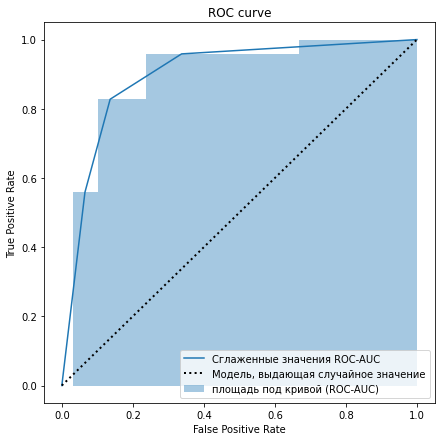

In [31]:
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()